Based on a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff).

# Practical Introduction to deep learning for computer vision

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory

## Introduction to convnets

**Instantiating a small convnet**

In [2]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**Training the convnet on MNIST images**

In [4]:
# Load MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape)
print(train_images.reshape((60000, 28, 28, 1)).shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history = model.fit(
    train_images, 
    train_labels, 
    validation_data=(test_images, test_labels), 
    epochs=5, 
    batch_size=64
    )

Epoch 1/5
938/938 [==============================] - 13s 5ms/step - loss: 0.1553 - accuracy: 0.9517 - val_loss: 0.0415 - val_accuracy: 0.9867
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0341 - val_accuracy: 0.9885
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.0241 - val_accuracy: 0.9925
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0224 - accuracy: 0.9932 - val_loss: 0.0210 - val_accuracy: 0.9923
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.0229 - val_accuracy: 0.9921


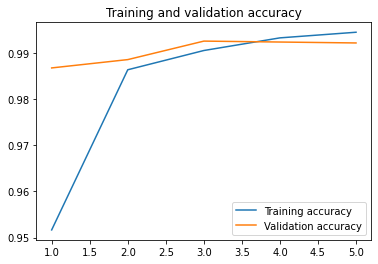

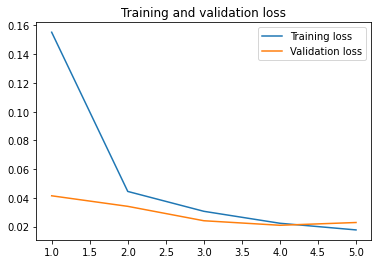

In [7]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label="Training accuracy")
plt.plot(epochs, val_accuracy, label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the convnet**

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0229 - accuracy: 0.9921
Test accuracy: 0.992


1/1 [==============================] - 0s 134ms/step


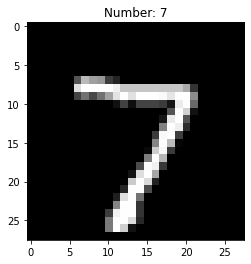

In [9]:
img_nr = 0

plt.title(f"Number: {np.argmax(model.predict(test_images[img_nr].reshape(1,28,28)))}")
plt.imshow(test_images[img_nr].reshape(28,28), cmap='gray')

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

**Copying images to training, validation, and test directories**

In [10]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [ ]:
!wget -O cats_vs_dogs_small.zip 
!unzip -qq cats_vs_dogs_small.zip 

### Building the model

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [15]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


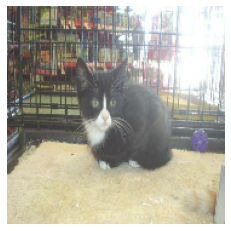

In [30]:
plt.figure(figsize=(10, 10))
for img, _ in train_dataset.take(1):
  plt.imshow(img[0].numpy().astype("uint8"))
  plt.axis("off")

**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [16]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Instantiating a small convnet for dogs vs. cats classification**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**Configuring the model for training**

In [19]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a `Dataset`**

In [20]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 82ms/step - loss: 0.7174 - accuracy: 0.5150 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 5s 72ms/step - loss: 0.6973 - accuracy: 0.5220 - val_loss: 0.6913 - val_accuracy: 0.5020
Epoch 3/30
63/63 [==============================] - 6s 80ms/step - loss: 0.6792 - accuracy: 0.5850 - val_loss: 0.6375 - val_accuracy: 0.6480
Epoch 4/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6319 - accuracy: 0.6535 - val_loss: 0.6187 - val_accuracy: 0.6560
Epoch 5/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6034 - accuracy: 0.6790 - val_loss: 0.5810 - val_accuracy: 0.7020
Epoch 6/30
63/63 [==============================] - 5s 70ms/step - loss: 0.5673 - accuracy: 0.7075 - val_loss: 0.6322 - val_accuracy: 0.6580
Epoch 7/30
63/63 [==============================] - 5s 70ms/step - loss: 0.5223 - accuracy: 0.7385 - val_loss: 0.8856 - val_accuracy: 0.6470
Epoch 8/30
63

**Displaying curves of loss and accuracy during training**

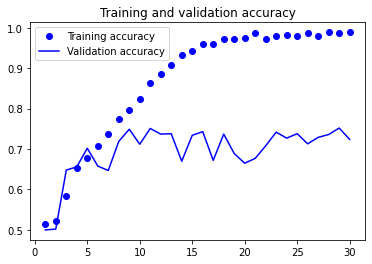

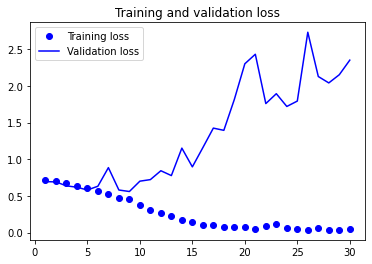

In [21]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [22]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 39ms/step - loss: 0.5845 - accuracy: 0.7295
Test accuracy: 0.729


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [23]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

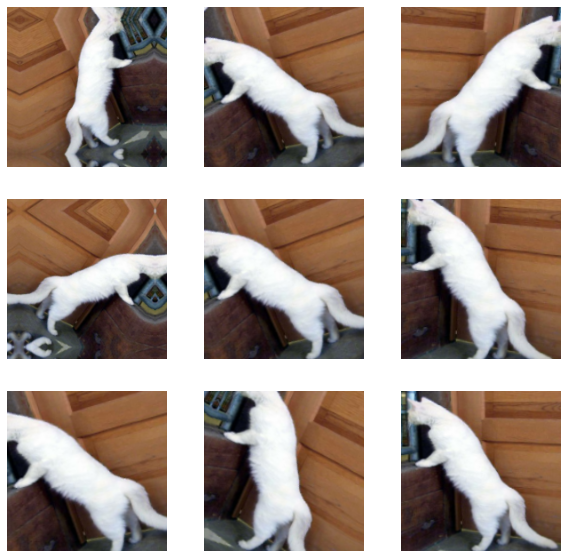

In [24]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [31]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/15
63/63 [==============================] - 6s 95ms/step - loss: 0.5670 - accuracy: 0.7160 - val_loss: 0.5683 - val_accuracy: 0.7080
Epoch 2/15
63/63 [==============================] - 6s 95ms/step - loss: 0.5576 - accuracy: 0.7135 - val_loss: 0.5266 - val_accuracy: 0.7410
Epoch 3/15
63/63 [==============================] - 6s 95ms/step - loss: 0.5428 - accuracy: 0.7315 - val_loss: 0.5412 - val_accuracy: 0.7320
Epoch 4/15
63/63 [==============================] - 6s 94ms/step - loss: 0.5273 - accuracy: 0.7375 - val_loss: 0.7250 - val_accuracy: 0.6840
Epoch 5/15
63/63 [==============================] - 6s 96ms/step - loss: 0.5306 - accuracy: 0.7330 - val_loss: 0.5845 - val_accuracy: 0.6960
Epoch 6/15
63/63 [==============================] - 6s 95ms/step - loss: 0.5143 - accuracy: 0.7485 - val_loss: 0.5299 - val_accuracy: 0.7440
Epoch 7/15
63/63 [==============================] - 6s 97ms/step - loss: 0.5090 - accuracy: 0.7565 - val_loss: 0.5257 - val_accuracy: 0.7440
Epoch 8/15
63

**Evaluating the model on the test set**

In [36]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 39ms/step - loss: 0.5308 - accuracy: 0.7420
Test accuracy: 0.742


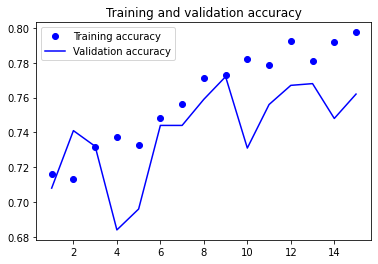

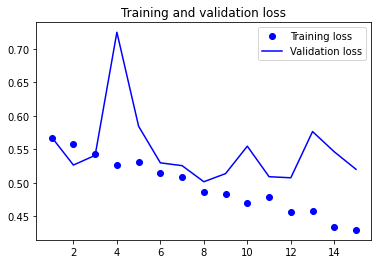

In [37]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [38]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [39]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [40]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 21ms/step


In [42]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [43]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 13.2329 - accuracy: 0.9265 - val_loss: 8.2150 - val_accuracy: 0.9560
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 3.6940 - accuracy: 0.9775 - val_loss: 8.6311 - val_accuracy: 0.9540
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 2.6831 - accuracy: 0.9790 - val_loss: 5.9378 - val_accuracy: 0.9650
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3846 - accuracy: 0.9885 - val_loss: 7.3880 - val_accuracy: 0.9600
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 0.3358 - accuracy: 0.9960 - val_loss: 3.8538 - val_accuracy: 0.9750
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.7330 - accuracy: 0.9940 - val_loss: 6.1394 - val_accuracy: 0.9720
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.5855 - accuracy: 0.9970 - val_loss: 8.5228 - val_accuracy: 0.9650
Epoch 8/20
63/63 [

**Plotting the results**

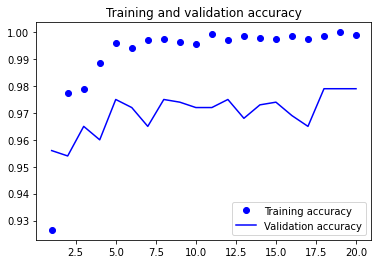

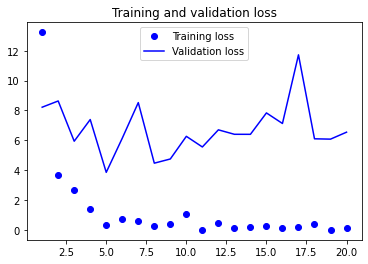

In [44]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [45]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [46]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [47]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [48]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [50]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/15
63/63 [==============================] - 13s 200ms/step - loss: 8.9985 - accuracy: 0.9390 - val_loss: 4.5888 - val_accuracy: 0.9710
Epoch 2/15
63/63 [==============================] - 13s 198ms/step - loss: 5.8842 - accuracy: 0.9495 - val_loss: 3.4142 - val_accuracy: 0.9750
Epoch 3/15
63/63 [==============================] - 13s 196ms/step - loss: 5.4662 - accuracy: 0.9590 - val_loss: 3.5476 - val_accuracy: 0.9810
Epoch 4/15
63/63 [==============================] - 13s 197ms/step - loss: 4.2767 - accuracy: 0.9625 - val_loss: 3.8782 - val_accuracy: 0.9780
Epoch 5/15
63/63 [==============================] - 13s 196ms/step - loss: 4.2026 - accuracy: 0.9645 - val_loss: 4.8722 - val_accuracy: 0.9720
Epoch 6/15
63/63 [==============================] - 13s 195ms/step - loss: 3.1520 - accuracy: 0.9735 - val_loss: 5.2897 - val_accuracy: 0.9730
Epoch 7/15
63/63 [==============================] - 13s 204ms/step - loss: 2.9145 - accuracy: 0.9730 - val_loss: 2.9576 - val_accuracy: 0.9770

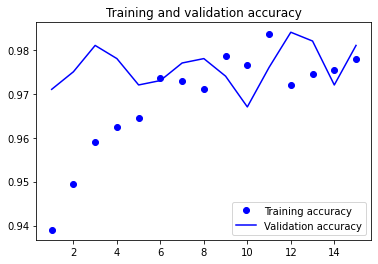

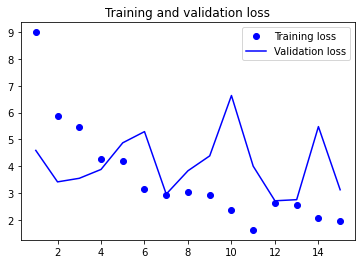

In [51]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [52]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 111ms/step - loss: 3.2554 - accuracy: 0.9755
Test accuracy: 0.975


### Fine-tuning a pretrained model

In [53]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [54]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [55]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 16s 222ms/step - loss: 1.6553 - accuracy: 0.9785 - val_loss: 2.7899 - val_accuracy: 0.9780
Epoch 2/30
63/63 [==============================] - 14s 219ms/step - loss: 0.9608 - accuracy: 0.9865 - val_loss: 2.5364 - val_accuracy: 0.9800
Epoch 3/30
63/63 [==============================] - 14s 216ms/step - loss: 0.9838 - accuracy: 0.9830 - val_loss: 2.5510 - val_accuracy: 0.9810
Epoch 4/30
63/63 [==============================] - 14s 217ms/step - loss: 0.8730 - accuracy: 0.9870 - val_loss: 2.6150 - val_accuracy: 0.9820
Epoch 5/30
63/63 [==============================] - 14s 220ms/step - loss: 0.8425 - accuracy: 0.9840 - val_loss: 2.0441 - val_accuracy: 0.9830
Epoch 6/30
63/63 [==============================] - 14s 220ms/step - loss: 0.4093 - accuracy: 0.9915 - val_loss: 1.8544 - val_accuracy: 0.9840
Epoch 7/30
63/63 [==============================] - 14s 224ms/step - loss: 0.3611 - accuracy: 0.9900 - val_loss: 2.1035 - val_accuracy: 0.9820

In [56]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 111ms/step - loss: 2.1389 - accuracy: 0.9750
Test accuracy: 0.975


**Final Remarks**

You can use Latex: $\sqrt{3x-1}+(1+x)^2$

Insert Images: 

![Image Deepl](https://1.cms.s81c.com/sites/default/files/2021-04-15/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png)


Run shell comands with !command or use jupyter magics with %command. 

!commands are executed in subshell => e.g. !cd does not change dir outside of cell, use %cd for that. 